[View in Colaboratory](https://colab.research.google.com/github/isaacyaf/example/blob/master/Keras_Custom_loss_function[AND__GATE_and_MNIST].ipynb)

自定義 loss
#AND GATE

In [2]:
import tensorflow as tf
import numpy as np
from numpy import array

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop, SGD
from IPython.display import clear_output


#GATE=> 0: AND GATE, 1: OR GATE
gate_type=0

#input_1, input_2, bias
training_set_inputs = array([[0, 0], [1, 1], [1, 0], [0, 1]])
if gate_type == 0: 
    #AND GATE
    training_set_outputs = array([[0, 1, 0, 0]]).T
    print("AND Gate Simulation:\n")
else:
    #OR GATE
    training_set_outputs = array([[0, 1, 1, 1]]).T
    print("OR Gate Simulation:\n")

    
train_tmp = training_set_inputs
train_DLy = training_set_outputs
inputdims = len(train_tmp[0])
batch_size = 4
nb_classes = 1
nb_epoch = 500
learning_rate=0.5


AND Gate Simulation:



Using TensorFlow backend.


In [0]:
#=========== Custom loss function =================
#ref the git from Keras & TF

## The mean_absolute_percentage_error
the_epsilon =1e-7

def mean(x, axis=None, keepdims=False):
    if x.dtype.base_dtype == tf.bool:
        x = tf.cast(x, floatx())
    return tf.reduce_mean(x, axis, keepdims)

def clip(x, min_value, max_value):
    """Element-wise value clipping.
    # Arguments
        x: Tensor or variable.
        min_value: Python float or integer.
        max_value: Python float or integer.
    # Returns
        A tensor.
    """
    if max_value is not None and max_value < min_value:
        max_value = min_value
    if max_value is None:
        max_value = np.inf
    min_value = tf.convert_to_tensor(min_value, dtype=x.dtype.base_dtype)
    max_value = tf.convert_to_tensor(max_value, dtype=x.dtype.base_dtype)
    return tf.clip_by_value(x, min_value, max_value)

def my_mean_absolute_percentage_error(y_true, y_pred):
  diff = tf.abs((y_true - y_pred) / clip(tf.abs(y_true), the_epsilon, None))
  return 100. * mean(diff, axis=-1)



## The mean_squared_error
def my_mean_squared_error(y_true, y_pred):
    return mean(tf.square(y_pred - y_true), axis=-1)




In [5]:
#================ Build your model ========================
model = Sequential()
model.add(Dense(1, input_dim=inputdims, activation='sigmoid', bias_initializer='random_uniform'))
model.summary()
#model.compile(loss='mean_squared_error',
model.compile(loss=my_mean_squared_error,
              optimizer=SGD(lr=learning_rate),
              metrics=['accuracy'])
#============================================================


#Learning
history = model.fit(train_tmp, 
                    train_DLy,
                    batch_size=batch_size, 
                    epochs=nb_epoch,
                    verbose=2)

clear_output()

print("Results after training:")
for input_tmp, p_tmp in zip(train_tmp, model.predict(train_tmp)):
  print("\tGate inputs: {0}, {1} \t Gate output: {2}".format(
      input_tmp[0], input_tmp[1], p_tmp[0]))

Results after training:
	Gate inputs: 0, 0 	 Gate output: 0.011379300616681576
	Gate inputs: 1, 1 	 Gate output: 0.7907288670539856
	Gate inputs: 1, 0 	 Gate output: 0.17260172963142395
	Gate inputs: 0, 1 	 Gate output: 0.17251726984977722


# MNIST


In [6]:
import tensorflow as tf
print (tf.__version__)
print(tf.test.gpu_device_name())

import numpy as np
np.random.seed(1234)  # for reproducibility (with others results)

from keras.datasets import mnist
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.models import load_model

import matplotlib.pyplot as plt
%matplotlib inline
import random as ran
from google.colab import files
from PIL import Image

1.10.0
/device:GPU:0


In [0]:
def creat_CNN():
  model = Sequential()
  # 1st CN layer
  model.add(Conv2D(filters=32,  
                   kernel_size=(5,5),  
                   padding='same',  
                   input_shape=(28,28,1),  
                   activation='relu')) 
  # 1st Max-pooling layer
  model.add(MaxPooling2D(pool_size=(2,2))) 

  # 2nd CN layer
  model.add(Conv2D(filters=64,  
                   kernel_size=(5,5),  
                   padding='same',  
                   activation='relu')) 
  # 2nd Max-pooling layer 
  model.add(MaxPooling2D(pool_size=(2,2))) 
  # Dropout layer  
  model.add(Dropout(0.25)) 

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))

  #softmax layer
  model.add(Dense(10))
  model.add(Activation('softmax'))
  
  return model

In [8]:
batch_size = 64
nb_classes = 10
#the number of epochs to train the model
nb_epoch = 10


#MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#ormalized the image data 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')  
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')  
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


In [9]:
model=creat_CNN()
model.summary()
model.compile(loss= my_mean_absolute_percentage_error,
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               401536    
__________

In [10]:
#Training
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 265us/step - loss: 8911695.4332 - acc: 0.9177 - val_loss: 2278419.3999 - val_acc: 0.9785
Epoch 2/10
60000/60000 [==============================] - 15s 247us/step - loss: 3761335.4632 - acc: 0.9638 - val_loss: 2281113.8707 - val_acc: 0.9772
Epoch 3/10
60000/60000 [==============================] - 14s 239us/step - loss: 2988033.9295 - acc: 0.9708 - val_loss: 1646939.2181 - val_acc: 0.9834
Epoch 4/10
60000/60000 [==============================] - 14s 237us/step - loss: 2535882.9761 - acc: 0.9751 - val_loss: 1477730.6418 - val_acc: 0.9851
Epoch 5/10
60000/60000 [==============================] - 14s 234us/step - loss: 2270268.1362 - acc: 0.9777 - val_loss: 1334297.1791 - val_acc: 0.9868
Epoch 6/10
60000/60000 [==============================] - 14s 233us/step - loss: 1965326.8363 - acc: 0.9808 - val_loss: 1129831.3459 - val_acc: 0.9887
Epoch 7/10
60000/60000 [====================

In [0]:
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    
def display_comparewriter(num):
    # prediction result as integer
    our_image=X_test[num].reshape(1,28,28,1)
    prediction = model.predict_classes(our_image)
    plt.title('Prediction: {0}'.format(prediction))
    plt.imshow(our_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

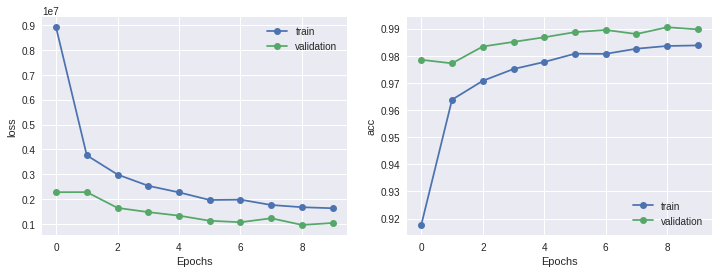

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

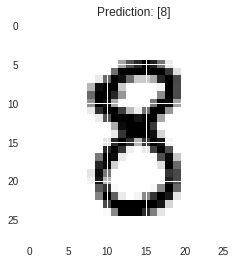

In [17]:
ranpick=ran.randint(0, X_test.shape[0])
display_comparewriter(ranpick)